### Non Linear Regression

Objectives:
    Differentiate between linear and non-linear regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Although linear regression can do a great job at modeling some datasets, it cannot be used for all datasets. First recall how linear regression, models a dataset. It models the linear relationship between a dependent variable y and the independent variables x. It has a simple equation, of degree 1, for example y=2𝑥+8

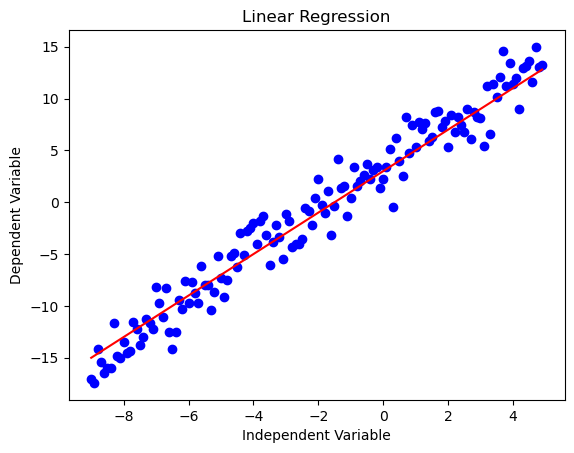

In [7]:
x = np.arange(-9.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.title('Linear Regression')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

 Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of  𝑘
  degrees (maximum power of  𝑥
 ). For example:

 𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑 
 
Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example:
𝑦=log(𝑥)
 
We can have a function that's even more complicated such as :
𝑦=log(𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑)

###### A cubic Graph

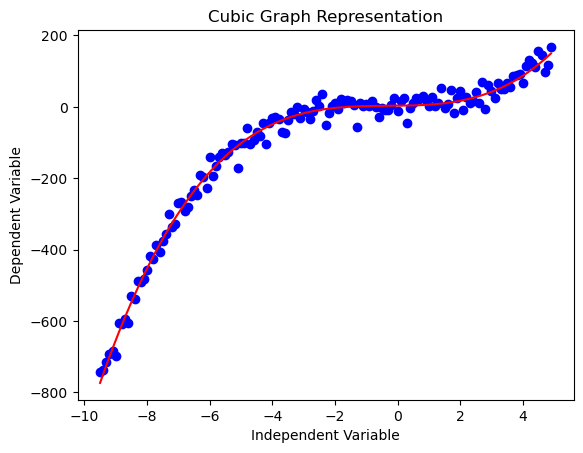

In [9]:
x= np.arange(-9.5, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Cubic Graph Representation')
plt.show()

### Quadratic

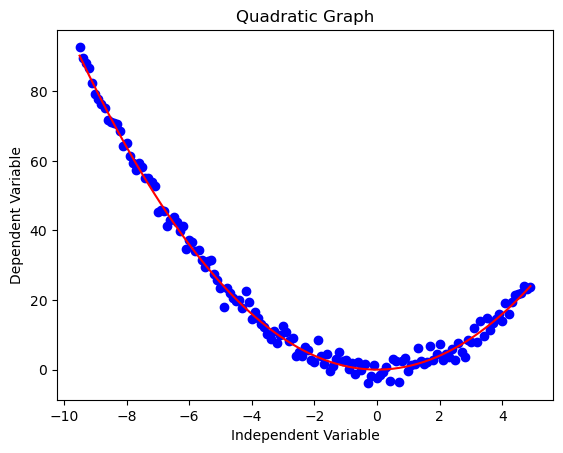

In [10]:
x = np.arange(-9.5, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Quadratic Graph')

plt.show()

### Non-Linear Regression Modeling 

Fitting a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. Using a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [15]:
df = pd.read_csv('china_gdp.csv')
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


#### This is what the datapoints look like. It kind of looks like an either logistic or exponential function.

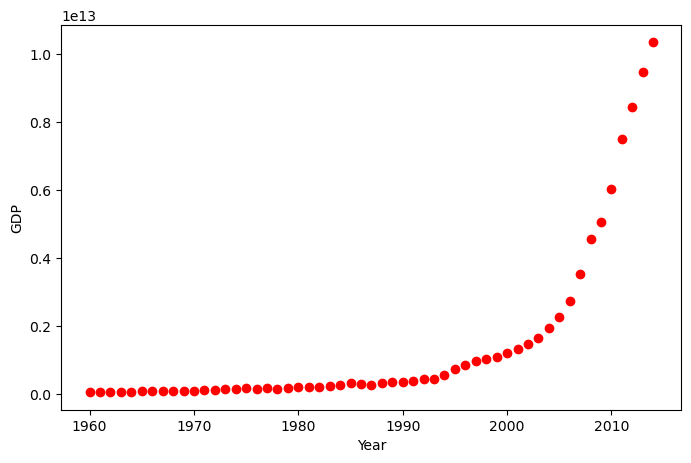

In [16]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.

#### Choosing a model
From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

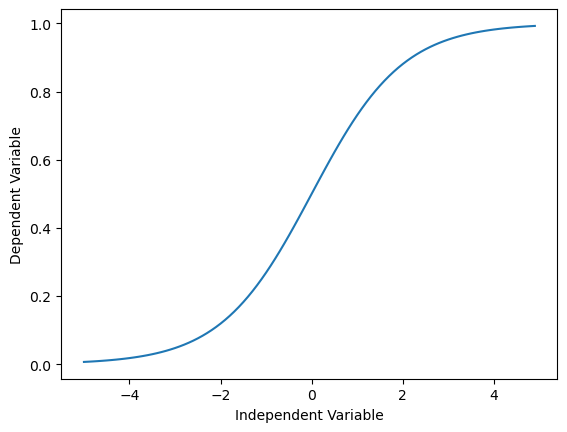

In [17]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Building The Model
Now, let's build our regression model and initialize its parameters

In [18]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

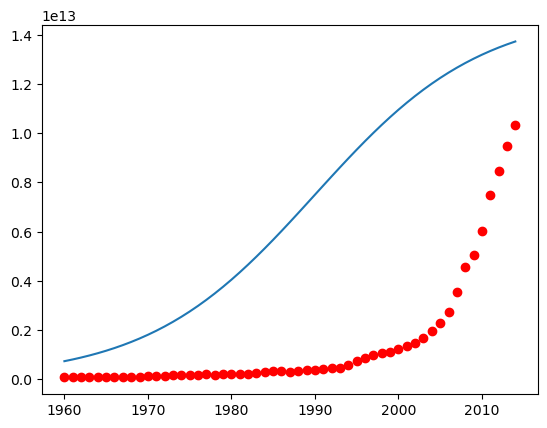

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. So first normalize our x and y:

In [20]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

How we find the best parameters for our fit line,
we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. 

In [21]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


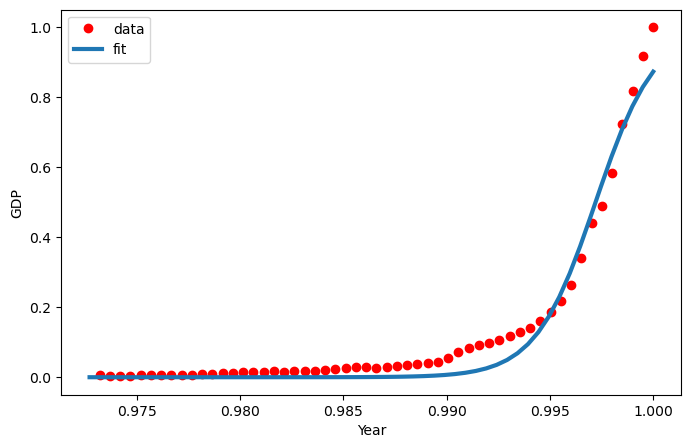

In [22]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Calculating the accuracy of our model

In [24]:
# split data into train test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.84


##### An R2-score closer to 1 indicates a good fit, while closer to 0 indicates poor fit. In this case, an R2-score of 0.84 suggests a poor fit of the model to the data.